In [ ]:
#mport os
#os.system("completeHK.py")
#os.system("DynamicBC.py")

In [1]:
import pandas as pd
import numpy as np
import igraph as igraph
import random

In [2]:
df = pd.read_csv("1107_trial1.csv")
df.shape

(10, 33)

[(0, {'Unnamed: 0': 5281, 'place': 'Houston, TX', 'created_at': 'Sun Jan 22 03:46:52 +0000 2017', 'hashtags': 'WomensMarch', 'favorite_count': 0, 'id': 8.23e+17, 'lang': 'en', 'possibly_sensitive': False, 'retweet_count': 2, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'text': "sad i wasn't able to go to the #WomensMarch", 'tweet_url': 'https://twitter.com/lillersn/status/823014040108670976', 'user_created_at': 'Mon Dec 31 17:50:50 +0000 2012', 'user_id': 1050852799, 'user_default_profile_image': False, 'user_description': 'NO DESCTIPTION AVAILABLE', 'user_favourites_count': 46013, 'user_followers_count': 490, 'user_friends_count': 347, 'user_listed_count': 3, 'user_name': 'lily', 'user_screen_name': 'lillersn', 'user_statuses_count': 38739, 'user_verified': False, 'index': 8454, 'date': '1/22/2017 3:46', 'lat': 29.786, 'lng': -95.3885, 'compound_score': '[0.307 0.693 0.   ]', 'initial_opinion': -0.4767, 'sentiment_score': '[0 0 0 0 0 

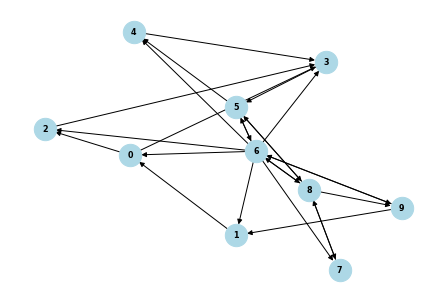

In [3]:
# the graph
def createAdjacencyMatrix(vertices,edges):
    noofvertices=len(vertices)
    adjM=np.zeros((noofvertices, noofvertices), dtype=int)
    while(len(adjM)<noofvertices):
        temp=[]
        for i in range(noofvertices):
            temp.append(0)
        adjM.append(temp)
    for edge in edges:
        i=edge[0]
        j=edge[1]
        if i>=noofvertices or j>=noofvertices or i<0 or j<0:
            print(f"Not a Proper Input in Edge {i},{j}")
        else:
            adjM[i][j]=1
            #adjM[j][i]=1
    #G=nx.Graph()
    #G.add_edges_from(edges)
    #nx.draw_networkx(G)
    #plt.show()
    return adjM


import networkx as nx
import matplotlib.pyplot as plt
import random
#create an empty graph
#make it directed
#get adjancency matrices of the graphs

G = nx.DiGraph()

# Add nodes with attributes from the dataframe, using row index as the node identifier
for index, row in df.iterrows():
    G.add_node(index, **row.to_dict())

# Add edges based on retweet counts
for index, row in df.iterrows():
    retweet_count = row['retweet_count']
    # Create edges based on the retweet count, avoiding self-loops
    if retweet_count > 0:
        potential_targets = [node for node in G.nodes if node != index]
        targets = random.sample(potential_targets, min(retweet_count, len(potential_targets)))
        for target in targets:
            G.add_edge(index, target)

# Set the initial confidence bound for each node
for node in G.nodes():
    G.nodes[node]['conf_bound'] = df.loc[node, 'conf_bound']

# Set initial opinion for each node
for node in G.nodes():
    G.nodes[node]['opinion'] = df.loc[node, 'initial_opinion']

# Check the graph structure
print(list(G.nodes(data=True))[:2])

print(nx.is_weakly_connected(G))

#print(G.nodes)
#len(G.edges)
M = createAdjacencyMatrix(G.nodes, G.edges)
#M.shape
# Visualize the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold')
plt.show()
  

In [3]:
#!pip install pycairo
import cairo

IGRAPH D--- 10 25 -- 
+ attr: conf_bound (v), opinion (v)
True


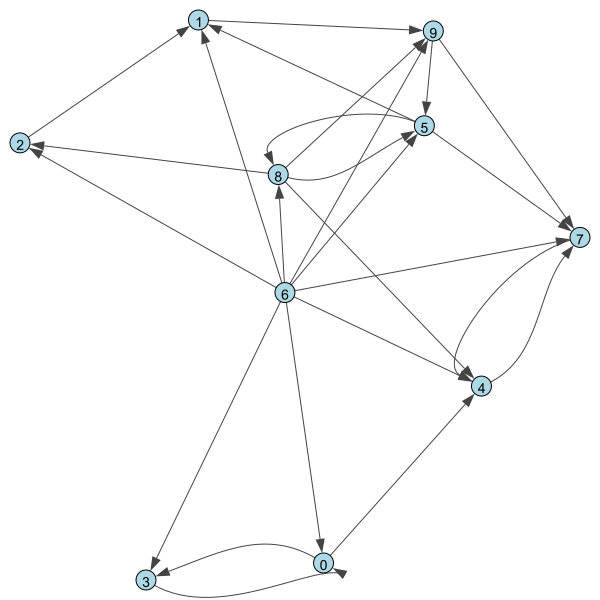

In [3]:
# with igraph
# Create an igraph graph
G = igraph.Graph(directed=True)

# Add vertices
G.add_vertices(len(df))

# Add edges and attributes
for index, row in df.iterrows():
    retweet_count = row['retweet_count']
    if retweet_count > 0:
        potential_targets = [i for i in range(G.vcount()) if i != index]
        targets = random.sample(potential_targets, min(retweet_count, len(potential_targets)))
        for target in targets:
            G.add_edge(index, target)

# Set attributes for vertices
for index, row in df.iterrows():
    G.vs[index]['conf_bound'] = row['conf_bound']
    G.vs[index]['opinion'] = row['initial_opinion']

# Check the graph structure
print(G.summary())

# Check if the graph is weakly connected
print(G.is_connected(mode='weak'))

# Visualizing the graph (requires pycairo or cairocffi)
layout = G.layout('fr')  # Fruchterman-Reingold layout
igraph.plot(G, layout=layout, vertex_label=G.vs.indices, vertex_size=20, vertex_color='lightblue')

In [5]:
print(G.vs[1]['conf_bound'])

1.1315


In [4]:
import DynamicBC

In [5]:
result = DynamicBC.HK(G, delta = 1, gamma = 0, t_start = 0, confidence_start = None,
                      tol = 0.02, Tmax = 10**6, Tmin = 0, T_acc = None, sigfigs = 3,
                      check_convergence = True, return_opinion_series = False, 
                      opinion_timestep = 1, return_animation_matrix = False, 
                      matrix_timestep = 100, nodeorder = None, patient_zero = False, 
                      initial_percentage_infected = 0.01)

In [6]:
print(result)

{'T': 9, 'T_acc': 0.001, 'bailout': False, 'n_clusters': 1, 'clusters': [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]], 'avg_opinion_diff': 0.0031491698513927357, 'total_change': [0.6233936163918841, 0.40301939154621397, 0.4888137543556904, 0.32445193350458845, 0.19819740447568712, 0.36548546873826304, 0.5120405363585689, 0.19610769609936837, 0.20339113487855243, 0.3684389639321962], 'final_opinions': [0.1351362830585509, 0.15010108464426225, 0.14970223799124832, 0.1337019335045884, 0.1439411688315882, 0.14964925688531966, 0.1450652322769363, 0.14673417507405725, 0.14903939291889318, 0.1494952567783102], 'local_receptiveness': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 'confidence': [1.0, 1.1315, 1.0, 1.0, 1.0, 1.0, 1.08125, 1.0625, 1.0, 1.0625]}
